# 3. 조회수와 연관이 있는 항목

In [91]:
import pandas as pd

input_fd = open("C:/Users/user/ESAA/KRvideos.csv", errors = 'backslashreplace', encoding='utf-8')
KR = pd.read_csv(input_fd)

input_fd = open('C:/Users/user/ESAA/JPvideos.csv', errors = 'backslashreplace',encoding='utf-8')
JP = pd.read_csv(input_fd)

In [5]:
KR.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,RxGQe4EeEpA,17.14.11,좋아 by 민서_윤종신_좋니 답가,라푸마코리아,22,2017-11-13T07:07:36.000Z,"라푸마|""윤종신""|""좋니""|""좋아""|""샬레""|""민서""",156130,1422,40,272,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False,윤종신 '좋니'의 답가 '좋아' 최초 공개!\n그 여자의 이야기를 지금 만나보세요....
1,hH7wVE8OlQ0,17.14.11,JSA 귀순 북한군 총격 부상,Edward,25,2017-11-13T10:59:16.000Z,"JSA|""귀순""|""북한군""|""총격""|""부상""|""JSA 귀순 북한군 총격 부상""",76533,211,28,113,https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,False,False,False,[채널A단독]北 병사 현재 '의식불명'… 혈압 떨어지는 중 \n[채널A단독]우리측 ...
2,9V8bnWUmE9U,17.14.11,나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼),나몰라패밀리 핫쇼,22,2017-11-11T07:16:08.000Z,"아디다스|""빼빼로""|""핫쇼""|""나몰라패밀리""|""대학로""|""공연""",421409,5112,166,459,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,False,False,False,퍼가실때 꼭 출처 부탁드려요
3,0_8py-t5R80,17.14.11,"이명박 출국 현장, 놓치면 안되는 장면",미디어몽구,25,2017-11-12T11:19:52.000Z,"이명박|""이명박 출국금지""|""이명박 출국현장""|""이명박 바레인""|""이명박 대통령""|...",222850,2093,173,1219,https://i.ytimg.com/vi/0_8py-t5R80/default.jpg,False,False,False,다스는 누구겁니까 듣고 난 후 표정
4,bk55RbxiQdI,17.14.11,김장겸은 물러갔다 MBC 노조 환호와 눈물,NocutV,25,2017-11-13T11:08:59.000Z,"nocutV|""노컷V""|""CBS""|""mbc""|""김장겸""|""해임""|""허일후""",84466,1094,109,450,https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg,False,False,False,김장겸 MBC 사장이 결국 해임됐다.\n\nMBC 대주주인 방송문화진흥회는 13일 ...


In [16]:
print(KR.shape)
print(JP.shape)

(34567, 9)
(20523, 9)


In [44]:
KR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34567 entries, 0 to 34566
Data columns (total 16 columns):
video_id                  34567 non-null object
trending_date             34567 non-null object
title                     34567 non-null object
channel_title             34567 non-null object
category_id               34567 non-null int64
publish_time              34567 non-null object
tags                      34567 non-null object
views                     34567 non-null int64
likes                     34567 non-null int64
dislikes                  34567 non-null int64
comment_count             34567 non-null int64
thumbnail_link            34567 non-null object
comments_disabled         34567 non-null bool
ratings_disabled          34567 non-null bool
video_error_or_removed    34567 non-null bool
description               31404 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 3.5+ MB


## 데이터 전처리

<**열 제거**>  

- 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description' 열 삭제  
- 같은 뜻의 말도 여러 말로 쓰일 수 있어 태그를 비교하는 것이 유의미하다고 보기 어려움 => 'tags' 열 삭제  

In [92]:
KR.drop(KR.columns[[6,11,12,13,14,15]], axis='columns', inplace=True)
JP.drop(JP.columns[[6,11,12,13,14,15]], axis='columns', inplace=True)

<**중복된 동영상 확인**>

In [51]:
KR['video_id'].duplicated().value_counts()

True     18691
False    15876
Name: video_id, dtype: int64

In [53]:
JP['video_id'].duplicated().value_counts()

False    12912
True      7611
Name: video_id, dtype: int64

중복된 데이터의 양이 꽤 많음 => 중복 데이터 제거

In [93]:
KR = KR.drop_duplicates(['video_id'])[:]
JP = JP.drop_duplicates(['video_id'])[:]

In [86]:
print(KR.shape)
print(JP.shape)

(15876, 10)
(12912, 10)


In [94]:
# KR 데이터와 JP 데이터 병합
total = pd.concat([KR, JP])

In [102]:
total.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,opinion
0,RxGQe4EeEpA,17.14.11,좋아 by 민서_윤종신_좋니 답가,라푸마코리아,22,2017-11-13T07:07:36.000Z,156130,1422,40,272,1462
1,hH7wVE8OlQ0,17.14.11,JSA 귀순 북한군 총격 부상,Edward,25,2017-11-13T10:59:16.000Z,76533,211,28,113,239
2,9V8bnWUmE9U,17.14.11,나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼),나몰라패밀리 핫쇼,22,2017-11-11T07:16:08.000Z,421409,5112,166,459,5278
3,0_8py-t5R80,17.14.11,"이명박 출국 현장, 놓치면 안되는 장면",미디어몽구,25,2017-11-12T11:19:52.000Z,222850,2093,173,1219,2266
4,bk55RbxiQdI,17.14.11,김장겸은 물러갔다 MBC 노조 환호와 눈물,NocutV,25,2017-11-13T11:08:59.000Z,84466,1094,109,450,1203


<**열 추가**>

In [95]:
# 'likes'와 'dislikes'를 합친 'opinion'열 만들기
total['opinion'] = total['likes'] + total['dislikes']

## 댓글 수, 좋아요, 싫어요의 조회수 영향도

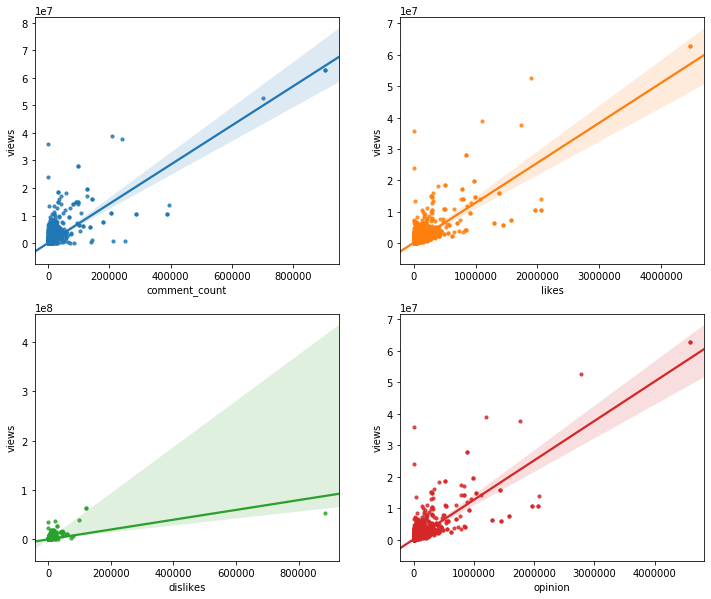

In [110]:
# 산점도와 선형 회귀 직선
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(ncols=2, nrows=2)
fig.set_size_inches(12,10)
sns.regplot(x='comment_count', y='views', data=total, scatter_kws={'s':10}, ax=ax1)
sns.regplot(x='likes', y='views', data=total, scatter_kws={'s':10}, ax=ax2)
sns.regplot(x='dislikes', y='views', data=total, scatter_kws={'s':10}, ax=ax3)
sns.regplot(x='opinion', y='views', data=total, scatter_kws={'s':10}, ax=ax4)

- 댓글, 좋아요와 의견(좋아요+싫어요) 모두의 조회수 영향도가 매우 크게 나타난다. (양 방향의 선형성)  
- 싫어요 칼럼은 다른 칼럼보다 조회수 영향도가 작다. 

## 댓글 수와 좋아요/싫어요의 관계

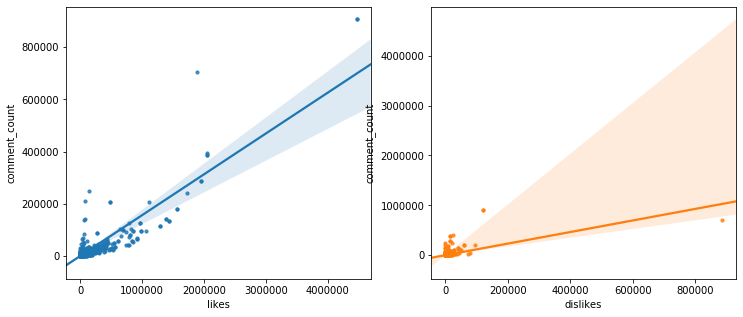

In [113]:
fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1)
fig.set_size_inches(12,5)
sns.regplot(x='likes', y='comment_count', data=total, scatter_kws={'s':10}, ax=ax1)
sns.regplot(x='dislikes', y='comment_count', data=total, scatter_kws={'s':10}, ax=ax2)

- 댓글도 마찬가지로 좋아요와는 양 방향의 선형성을 크게 띄고 싫어요와는 상대적으로 작게 띈다.